In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [30]:
dataset = keras.datasets.mnist
dataset= dataset.load_data()

In [31]:
(x_train_full, y_train_full), (x_test, y_test) = dataset

In [32]:
print(x_train_full.shape)
print(y_train_full.shape)

(60000, 28, 28)
(60000,)


In [33]:
x_train = x_train_full[:50000] / 255.0
x_valid = x_train_full[50000:] / 255.0
y_train = y_train_full[:50000] 
y_valid = y_train_full[50000:]

In [34]:
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)
print(x_test.shape)

(50000, 28, 28)
(50000,)
(10000, 28, 28)
(10000,)
(10000, 28, 28)


In [35]:
model = keras.Sequential(
    [
    layers.Flatten(input_shape=[28,28]),
    layers.Dense(30, activation="relu"),
    layers.Dense(15, activation="relu"),
    layers.Dense(10, activation="softmax")
    ])

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 30)                23550     
_________________________________________________________________
dense_4 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                160       
Total params: 24,175
Trainable params: 24,175
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [38]:
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=10)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 5s 105us/sample - loss: 0.9017 - accuracy: 0.7380 - val_loss: 0.3700 - val_accuracy: 0.8987
Epoch 2/10
50000/50000 [==============================] - 5s 98us/sample - loss: 0.3537 - accuracy: 0.8991 - val_loss: 0.3053 - val_accuracy: 0.9130
Epoch 3/10
50000/50000 [==============================] - 5s 93us/sample - loss: 0.3018 - accuracy: 0.9136 - val_loss: 0.2658 - val_accuracy: 0.9248
Epoch 4/10
50000/50000 [==============================] - 5s 95us/sample - loss: 0.2719 - accuracy: 0.9212 - val_loss: 0.2436 - val_accuracy: 0.9338
Epoch 5/10
50000/50000 [==============================] - 5s 94us/sample - loss: 0.2496 - accuracy: 0.9289 - val_loss: 0.2272 - val_accuracy: 0.9362
Epoch 6/10
50000/50000 [==============================] - 5s 98us/sample - loss: 0.2319 - accuracy: 0.9332 - val_loss: 0.2151 - val_accuracy: 0.9397
Epoch 7/10
50000/50000 [==============================]

In [39]:
history.history

{'loss': [0.9016864336967468,
  0.3537348445558548,
  0.3017701617383957,
  0.2719111491394043,
  0.2495925300848484,
  0.23187967885136604,
  0.21613794746875764,
  0.2034630191028118,
  0.19188552963256836,
  0.18191079535603524],
 'accuracy': [0.738,
  0.89908,
  0.91358,
  0.92116,
  0.92888,
  0.93316,
  0.93782,
  0.94038,
  0.94474,
  0.94736],
 'val_loss': [0.3700082209467888,
  0.30534083847403526,
  0.26582312797307966,
  0.24360525722503662,
  0.22721773484051228,
  0.21513794669210912,
  0.2005011132478714,
  0.19106347564011814,
  0.1808282139018178,
  0.1743471334040165],
 'val_accuracy': [0.8987,
  0.913,
  0.9248,
  0.9338,
  0.9362,
  0.9397,
  0.9454,
  0.948,
  0.9491,
  0.9509]}

In [40]:
loss = history.history["loss"]
accuracy = history.history["accuracy"]
val_loss = history.history["val_loss"]
val_acc = history.history["val_accuracy"]

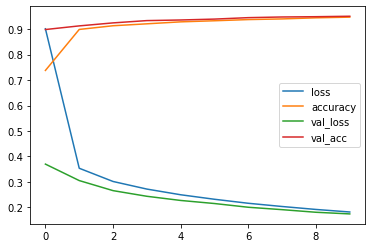

In [41]:
plt.plot(loss, label="loss")
plt.plot(accuracy, label="accuracy")
plt.plot(val_loss, label="val_loss")
plt.plot(val_acc, label="val_acc")
plt.legend()

In [42]:
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [45]:
x_pred = x_test[:1]

In [46]:
y_hat = model.predict_classes(x_pred)

In [ ]:
for i in range(len(y_hat)):
    print("actual digit: ", classes[y_test[i]], "predicted digit: ", classes[y_hat[i]])
    if classes[y_test[i]] == classes[y_hat[i]]:
        print("correct prediction")
    else:
        print("incorrect prediction")

In [ ]:
for i in range(len(y_hat)):
    image = x_pred[i]
    fig = plt.figure
    plt.imshow(image, cmap='gray')
    plt.show()

In [47]:
y_hat = model.predict_classes(x_pred)

In [57]:
im = Image.open("image.png")
im = np.resize(im, (28,28,1))
im2arr = np.array(im)
im2arr = im2arr.reshape(1,28,28)
x_pred = im2arr / 255.0
pred = model.predict(x_pred)

In [59]:
pred

array([[0.06543574, 0.03326679, 0.12225729, 0.03843772, 0.15359582,
        0.3325332 , 0.1208318 , 0.04829444, 0.03241678, 0.05293035]],
      dtype=float32)